## Task f : Define a strategy to represent text data (e.g., feature extraction/engineering)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import torch
from transformers import BertModel, BertTokenizer


/home/georg/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Preprocess pickle files and Tokenization 

In [9]:
folder_path = "/home/georg/projects/university/C5/multimodal_dataset/First_Impressions_v3_multimodal"

preprocess_folder = "/home/georg/projects/university/C5/MCV-C5-G4/week6/task_f"

directories = {"train": "train", "valid": "valid", "test": "test"}

for directory, subdir in directories.items():

    directory_path = os.path.join(folder_path, subdir)
    output_file = os.path.join(preprocess_folder, f"preprocessed_text_{directory}.txt")
    os.makedirs(preprocess_folder, exist_ok=True)

    with open(output_file, "w") as output:
        if not os.path.exists(directory_path):
            print(f"Directory {directory_path} does not exist.")
            continue

        for item in os.listdir(directory_path):
            item_path = os.path.join(directory_path, item)

            if os.path.isdir(item_path):
                output.write(f"Processing folder {item} in {directory} directory:\n")

                for file_name in os.listdir(item_path):
                    if file_name.endswith(".pkl"):
                        file_path = os.path.join(item_path, file_name)

                        with open(file_path, "rb") as f:
                            try:
                                transcription = pickle.load(f)
                                print(f"Loaded transcription: {transcription}")
                            except Exception as e:
                                print(f"Error loading pickle file {file_path}: {e}")
                                continue

                            transcription = transcription.lower()
                            transcription = ''.join(e for e in transcription if e.isalnum() or e.isspace())
                            print(f"Loaded transcription: {transcription}")

                            
                            output.write(f"File: {file_name}\n")
                            output.write(f"Preprocessed Transcription: {transcription}\n")

                output.write("\n")  


Loaded transcription: I think that one should be extremely careful this type of lying. Now of course they're deeper reasons people lie. Again, it goes back to insecurities, fears, where they learned from people around them to lie. They saw lying as being an easy way out of a situation. There's a lot -
Loaded transcription: i think that one should be extremely careful this type of lying now of course theyre deeper reasons people lie again it goes back to insecurities fears where they learned from people around them to lie they saw lying as being an easy way out of a situation theres a lot 
Loaded transcription: Where they became, became a friend after our work at one of the wells together. [Tim Rice 00:00:36] is another lovely fellow. [Nikolai Foster 00:00:40], who is a director that I've worked with most recently.
Loaded transcription: where they became became a friend after our work at one of the wells together tim rice 000036 is another lovely fellow nikolai foster 000040 who is a di

## Represent text data using BoW and BERT

(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)


KeyboardInterrupt: 

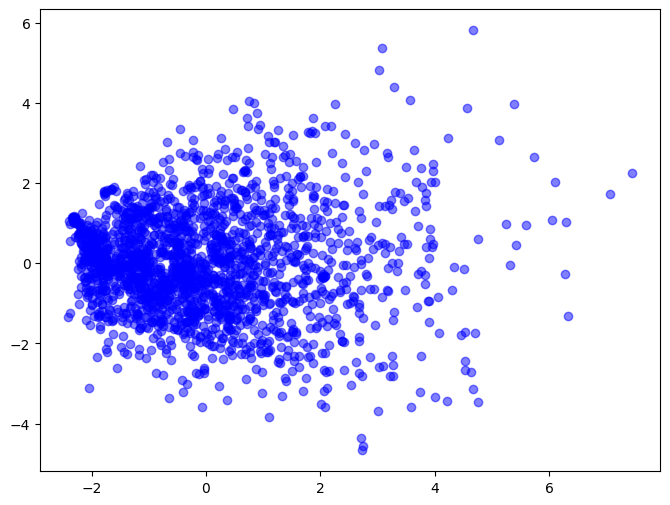

In [14]:
file_path = "/home/georg/projects/university/C5/MCV-C5-G4/week6/task_f/preprocessed_text_test.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

# extract transcriptions 
transcriptions = []
for line in lines:
    if line.startswith("Preprocessed Transcription:"):
        transcription = line[len("Preprocessed Transcription:"):].strip()
        transcriptions.append(transcription)

# create bow representation
vectorizer = CountVectorizer()
bag_of_words_representation = vectorizer.fit_transform(transcriptions)

# apply PCA to reduce dimensions for visualization
pca_bow = PCA(n_components=2)
bow_pca = pca_bow.fit_transform(bag_of_words_representation.toarray())

# plot PCA-transformed representations for BoW
plt.figure(figsize=(8, 6))
plt.scatter(bow_pca[:, 0], bow_pca[:, 1], alpha=0.5, label="BoW", color='blue')

# load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

embeddings = []

for line in lines:
    if line.startswith("Preprocessed Transcription:"):
        text = line[len("Preprocessed Transcription:"):].strip()

        # tokenize the text
        inputs = tokenizer(transcription, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        # get BERT embeddings
        with torch.no_grad():
            print(inputs)
            outputs = model(**inputs)
            last_hidden_state = outputs.last_hidden_state

            # average pooling of embeddings
            avg_pooling = torch.mean(last_hidden_state, dim=1).squeeze()

            # convert tensor to numpy array
            embedding = avg_pooling.numpy()
            print(embedding.shape)

            # append embedding to list
            embeddings.append(embedding)

# Convert list of embeddings to numpy array
embeddings = np.array(embeddings)

# Apply PCA to reduce dimensions for visualization
pca_bert = PCA(n_components=2)
bert_pca = pca_bert.fit_transform(embeddings)

# plot PCA-transformed representations for BERT
plt.scatter(bert_pca[:, 0], bert_pca[:, 1], alpha=0.5, label="BERT", color='red')
plt.title("PCA Visualization of BoW and BERT Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


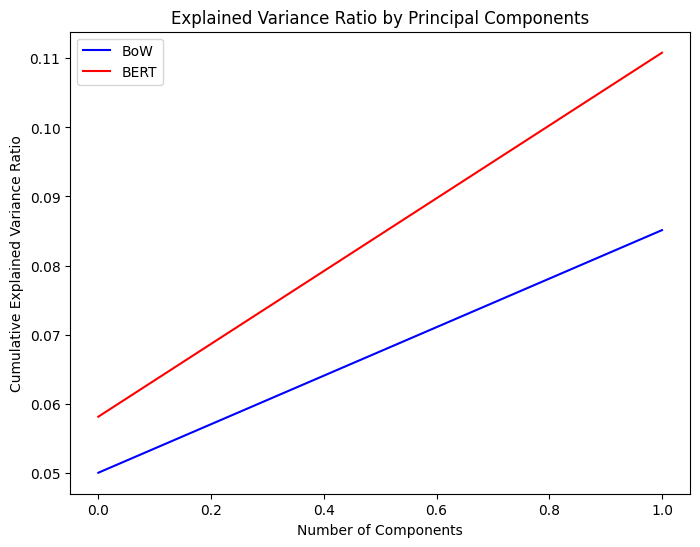

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_bow.explained_variance_ratio_), label="BoW", color='blue')
plt.plot(np.cumsum(pca_bert.explained_variance_ratio_), label="BERT", color='red')
plt.title("Explained Variance Ratio by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.legend()
plt.show()